# Assignment 7: Comparative Analysis of Data Analysis Libraries - Modin
<a target="_blank" href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/WATERMILON/modin.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In this assignment, we aim to analyze a substantial dataset, specifically the [UK Property Price data from 1995 to April 2023](https://www.kaggle.com/datasets/willianoliveiragibin/uk-property-price-data-1995-2023-04). Our primary focus is on employing Modin as the primary tool for data cleaning, data visualization, and addressing various analytical questions. The objective is to demonstrate the efficiency and effectiveness of Modin in handling large datasets when compared to other libraries.

## Group Information
**Group Name**: WATERMILON

**Group Members:**

| Name                | Matrix Number | Task   |
| ------------------- | ------------- | ------ |
| NG ZI XING          | A21EC0213     | Modin  |
| LOO ZHI YUAN        | A21EC0197     | Vaex   |
| YEW RUI XIANG       | A21EC0149     | Dask   |
| SAM CHIA YUN        | A21EC0127     | Vaex   |

## About the Data

The dataset under consideration provides comprehensive information on property sales in England and Wales. Sourced from the UK government's HM Land Registry, it furnishes valuable insights into property transactions, encompassing sale prices, locations, and property types. Analysts, researchers, and businesses can leverage this dataset to comprehend market trends, property valuations, and identify investment opportunities within the real estate sector of England and Wales.

### Columns Explanation

- **Postcode:** The postal code denoting the property's location.
- **PAON (Primary Addressable Object Name):** Typically the house number or name.
- **SAON (Secondary Addressable Object Name):** Additional information if the building is divided into flats or sub-buildings.
- **Street:** The street name where the property is situated.
- **Locality:** Supplementary locality information.
- **Town/City:** The town or city where the property is positioned.
- **District:** The district in which the property is situated.
- **County:** The county where the property is located.
- **Price Paid:** The amount for which the property was sold.

This information will serve as the foundation for our analysis, showcasing the prowess of Modin in managing extensive datasets in comparison to other libraries.

## Downloading the Dataset

**Upload Kaggle.json File:**

> Please upload your `kaggle.json` file, which contains your username and API key.


In [ ]:
from google.colab import files

files.upload()
pass

Saving kaggle.json to kaggle.json


**Download the Data:**

Let's initiate the process by acquiring the dataset.


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d willianoliveiragibin/uk-property-price-data-1995-2023-04

100% 1.36G/1.36G [00:17<00:00, 60.2MB/s]
100% 1.36G/1.36G [00:17<00:00, 81.1MB/s]


In [ ]:
!unzip /content/uk-property-price-data-1995-2023-04.zip

Archive:  /content/uk-property-price-data-1995-2023-04.zip
  inflating: 202304.csv              


## Data Preparation and Cleaning
In the process of preparing and cleaning the data, the following steps will be undertaken:

- **Related Package Loading:**
  Including upgrade pandas, dask and modin

- **Dataset Loading:**
  Load the dataset to initiate the data preparation phase.

- **Data Quality Enhancement:**
  Address issues related to missing, incorrect, and invalid data to enhance the overall quality of the dataset.

- **Additional Data Manipulation:**
  Execute supplementary steps such as date parsing, column creation

In [ ]:
!pip install -U pandas
!pip install -U dask
!pip install -U modin[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.17.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.3 MB/s eta 0:00:00
  Attempting unin

Import the required packages and configure the settings by setting the maximum partition number to 128 and the number of workers to 4.


In [1]:
import numpy as np
import os
import pandas
import modin.pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import modin.config as cfg
from dask.distributed import Client

os.environ["MODIN_ENGINE"] = "dask"
cfg.NPartitions.put(512)
client = Client(n_workers = 2, threads_per_worker = 2)


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-8cke085v', purging
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:40881
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43111'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42051'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:35241', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35241
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:50006
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:38981', name: 0, status: init, memory: 0, proc

Load the .csv file using the `read_csv` function. Since the CSV file lacks a header column, set the header parameter to None. Manually assign column names to address this issue.


In [2]:
%%time

colnames=['Transaction_unique_identifier', 'price', 'Date_of_Transfer', 'postcode', 'Property_Type',
          'Old/New', 'Duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City', 'District', 'County', 'PPDCategory_Type','Record_Status - monthly_file_only']

data = pd.read_csv("/content/202304.csv", header = None, names = colnames, parse_dates = ["Date_of_Transfer"])

CPU times: user 28.7 s, sys: 4.52 s, total: 33.2 s
Wall time: 3min 23s


In [ ]:
data.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only
0,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07,MK15 9HP,D,N,F,31,NaN,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A,A
1,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03,SR6 0AQ,T,N,F,50,NaN,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
2,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13,CO6 1SQ,T,N,F,19,NaN,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
3,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28,B90 4TG,T,N,F,37,NaN,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
4,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28,DY5 1SA,S,N,F,59,NaN,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A


Upon executing `data.info()`, it becomes evident that the dataset comprises over 20 million rows and 16 columns, with a predominant use of object data types. Notably, the dataset is substantial, with a size exceeding 3.4 gigabytes.


In [ ]:
%%time
data.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 28276228 entries, 0 to 28276227
Data columns (total 16 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Transaction_unique_identifier      object        
 1   price                              int64         
 2   Date_of_Transfer                   datetime64[ns]
 3   postcode                           object        
 4   Property_Type                      object        
 5   Old/New                            object        
 6   Duration                           object        
 7   PAON                               object        
 8   SAON                               object        
 9   Street                             object        
 10  Locality                           object        
 11  Town/City                          object        
 12  District                           object        
 13  County                             object        


In [3]:
%%time

data.drop(["Transaction_unique_identifier", "Record_Status - monthly_file_only"], axis = 1, inplace = True)

CPU times: user 11.1 ms, sys: 1.5 ms, total: 12.6 ms
Wall time: 22.3 ms


Considering that nearly 90% of the SAON column is empty, it is prudent to drop this column. Additionally, the Locality column contains redundant information with other location-related rows, leading to the decision to remove it. To address null values in other columns, a straightforward approach is to replace them with a pseudo-class, denoted as "UNK." For numeric null columns like PAON, the null values will be replaced with zero.


In [ ]:
%%time
data.isna().sum() / data.shape[0]

CPU times: user 10.8 s, sys: 946 ms, total: 11.8 s
Wall time: 53.6 s


In [4]:
%%time
data.drop(["SAON", "Locality"], axis = 1, inplace = True)

CPU times: user 10.7 ms, sys: 63 µs, total: 10.8 ms
Wall time: 11.5 ms


In [5]:
%%time
data.fillna({"postcode" : "UNK", "PAON" : 0, "Street" : "UNK"}, inplace = True)

CPU times: user 625 ms, sys: 42 ms, total: 667 ms
Wall time: 723 ms


Review the cleaning results

In [ ]:
%%time
data.isna().sum() / data.shape[0]

CPU times: user 7.1 s, sys: 573 ms, total: 7.67 s
Wall time: 39.2 s


price               0.0
Date_of_Transfer    0.0
postcode            0.0
Property_Type       0.0
Old/New             0.0
Duration            0.0
PAON                0.0
Street              0.0
Town/City           0.0
District            0.0
County              0.0
PPDCategory_Type    0.0
dtype: float64

Convert all object columns to string type.


In [6]:
%%time
colnames = ["postcode", "Property_Type", "Duration", "PAON", "Street", "Town/City", "District", "County", "Old/New", "PPDCategory_Type"]

data[colnames] = data.astype( { col : str for col in colnames} )[colnames]

CPU times: user 34.9 s, sys: 3.67 s, total: 38.5 s
Wall time: 4min 52s


Convert the `Date of Transfer` column into two separate columns for the year and month. Exclude detailed information beyond the month, as it is not required for our analysis.


In [3]:
data["year"] = data["Date_of_Transfer"].dt.year
data["month"] = data["Date_of_Transfer"].dt.month

data.drop("Date_of_Transfer", axis = 1, inplace = True)

In [ ]:
data.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 28276228 entries, 0 to 28276227
Data columns (total 13 columns):
 #   Column            Dtype
---  ------            -----
 0   price             int64
 1   postcode          <U0  
 2   Property_Type     <U0  
 3   Old/New           <U0  
 4   Duration          <U0  
 5   PAON              <U0  
 6   Street            <U0  
 7   Town/City         <U0  
 8   District          <U0  
 9   County            <U0  
 10  PPDCategory_Type  <U0  
 11  year              int32
 12  month             int32
dtypes: int32(2), int64(1), str(10)
memory usage: 2.5 GB


## Exploratory Analysis and Visualization

During this session, we will conduct exploratory data analysis by delving into the components or values of specific columns. Our aim is to examine general relationships between certain columns and property prices, extracting insights that may lead to interesting questions for further exploration in the next session.


We observe that the mean property price is approximately \$ 218,000, while the median is \$ 150,000. This notable difference suggests a potential right-skewed distribution in the price data. This leads us to our initial question: What is the coefficient of skewness for the property prices?


In [ ]:
%%time

data.describe()

CPU times: user 2.67 s, sys: 116 ms, total: 2.78 s
Wall time: 3.63 s


,price,year,month
count,2.827623e+07,2.827623e+07,2.827623e+07
mean,2.181305e+05,2.008148e+03,6.768895e+00
std,8.688524e+05,8.178055e+00,3.353060e+00
min,1.000000e+00,1.995000e+03,1.000000e+00
25%,8.495000e+04,2.001000e+03,4.000000e+00
50%,1.499500e+05,2.007000e+03,7.000000e+00
75%,2.475000e+05,2.016000e+03,1.000000e+01
max,5.943000e+08,2.023000e+03,1.200000e+01


As anticipated, the price exhibits a highly right-skewed distribution, indicating the presence of outliers in the right tail.


INFO:distributed.core:Event loop was unresponsive in Scheduler for 8.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 8.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


CPU times: user 55 s, sys: 9.25 s, total: 1min 4s
Wall time: 5min 1s


<Axes: >

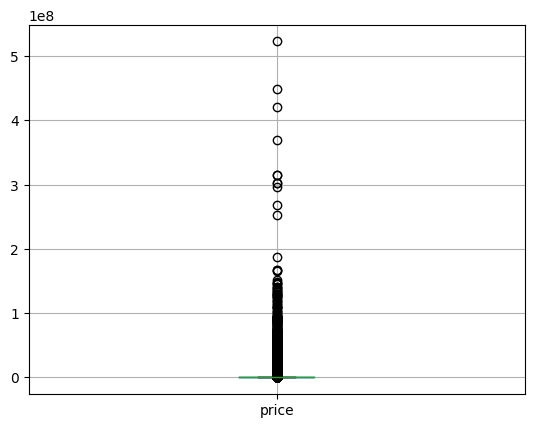

In [ ]:
%%time
data.sample(frac = 0.2).boxplot(column = ["price"])

To ensure data neutrality and avoid regional bias, it is essential to balance the proportion of data from each country. A pie chart visualization reveals a relatively uniform sample distribution across most countries, prompting the question of the extent to which property prices depend on the country. Notably, Greater London stands out with the largest sample size. This leads us to consider exploring property prices specifically in Greater London for further insights.


the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


CPU times: user 17.1 s, sys: 1.24 s, total: 18.3 s
Wall time: 1min 10s


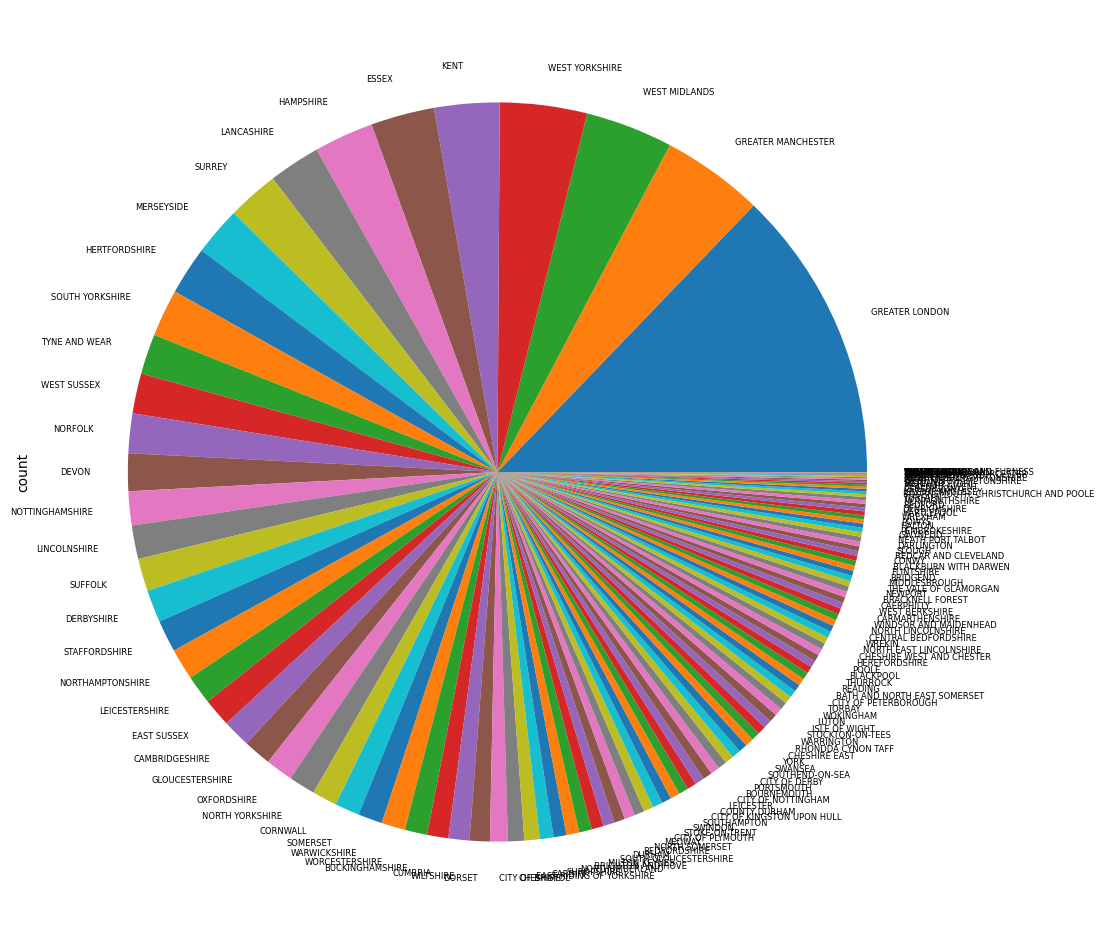

In [ ]:
%%time
ax = data["County"].sample(frac = 0.1).value_counts().plot.pie(figsize = (15,12), fontsize = 6)

Recognizing the importance of the number of classes in a column, we have calculated the number of unique values for three columns: Duration, Old/New, and PPDCategory Type. The results reveal that Duration has three classes, while Old/New and PPDCategory_Type each have two classes. The next question to explore is how these classes influence property prices. Given the limited unique values, we can employ a bar chart in the next session to delve into this analysis.


CPU times: user 12.3 s, sys: 1.1 s, total: 13.4 s
Wall time: 1min 20s


<Axes: >

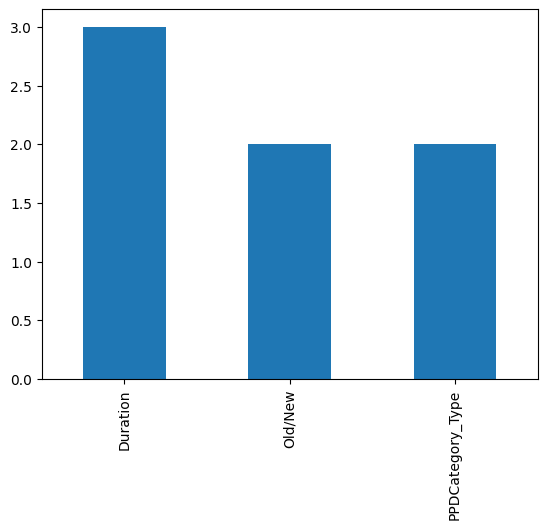

In [ ]:
%%time

count = data[["Duration", "Old/New", "PPDCategory_Type"]].apply(lambda x : x.unique().shape[0] )
count.plot.bar()

Common sense suggests that property type should significantly influence property prices. To explore this relationship, we can create a box plot of property prices based on different property types. The plot reveals distinct variations in price dispersion among property types. However, to further understand the heights of prices, we will address this aspect in the next section.


INFO:distributed.core:Event loop was unresponsive in Nanny for 5.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.85s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 5.85s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


CPU times: user 35.1 s, sys: 2.98 s, total: 38 s
Wall time: 3min 5s


<Axes: title={'center': 'price'}, xlabel='[Property_Type]'>

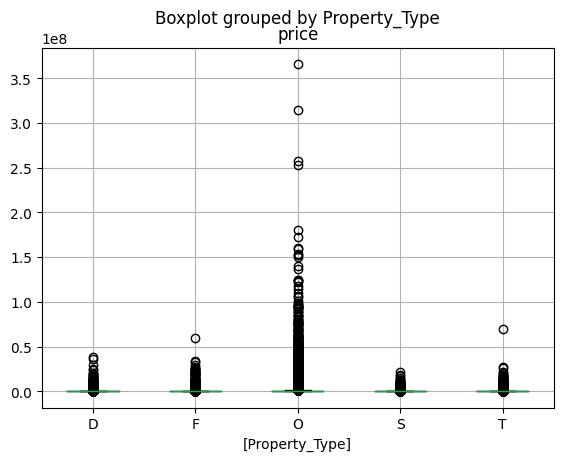

In [ ]:
%%time
data[["Property_Type", "price"]].sample(frac = 0.1).boxplot(by = "Property_Type")

## Asking and Answering Questions

In this session, the following part will be done:
1. **6 insightful questions about the dataset:**
2. **Answer the questions using Numpy/Pandas computations or by plotting graphs with Matplotlib/Seaborn and sklearn:**
3. **Perform necessary data manipulations based on previous findings:**
  


### To what degree is the price distribution skewed?

> **Solution:** Calculate the coefficient of skewness for property prices.

> **Answer:** Despite an exponential distribution having a skewness of 2, the skewness for property prices is nearly 90 times, indicating a highly right-skewed distribution. This suggests that the median is a more robust estimator than the mean. Furthermore, it implies that property prices globally are not evenly distributed, highlighting a disparity between affluent and less affluent segments of the population.


In [ ]:
%%time

data["price"].skew()

CPU times: user 8.68 s, sys: 968 ms, total: 9.65 s
Wall time: 1min 25s


183.5584770212359

### Does the country where the property is located significantly influence its price?

> **Solution:** Given the diverse presence of countries in the dataset, traditional plotting may not be suitable. Instead, apply mutual information regression to quantify the contribution of country information to the price.

> **Answer:** The mutual information of the country to price is 0.01, indicating a relationship between them, but the influence is not substantial. This suggests that while the country is a factor, it is not the sole determinant of property prices.


In [ ]:
%%time
from sklearn.feature_selection import mutual_info_regression

test_data = data[["County", "price"]].sample(frac = 0.1)
mutual_info_regression( np.expand_dims( pd.factorize( test_data["County"] )[0], axis = 1), test_data["price"])

INFO:distributed.core:Event loop was unresponsive in Nanny for 4.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 4.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

CPU times: user 1min 44s, sys: 4.28 s, total: 1min 48s
Wall time: 4min 5s


array([0.01018625])

In [ ]:
del test_data

### How does the district affect the price and its dispersion in property?

> **Solution:** Generate two charts depicting the mean and standard deviation of property prices for each district. For illustrative purposes, we focus on districts within the Greater London country.

> **Answer:** The trend observed in both charts is quite similar. Districts with higher mean prices also exhibit higher standard deviations. This indicates that in districts with elevated property prices, the disparity in property prices across different properties within the district is more pronounced. The City of London stands out with both the highest property prices and standard deviation.


CPU times: user 39.1 s, sys: 3.79 s, total: 42.9 s
Wall time: 4min 16s


array([<Axes: title={'center': '(price, mean)'}, xlabel='District'>,
       <Axes: title={'center': '(price, std)'}, xlabel='District'>],
      dtype=object)

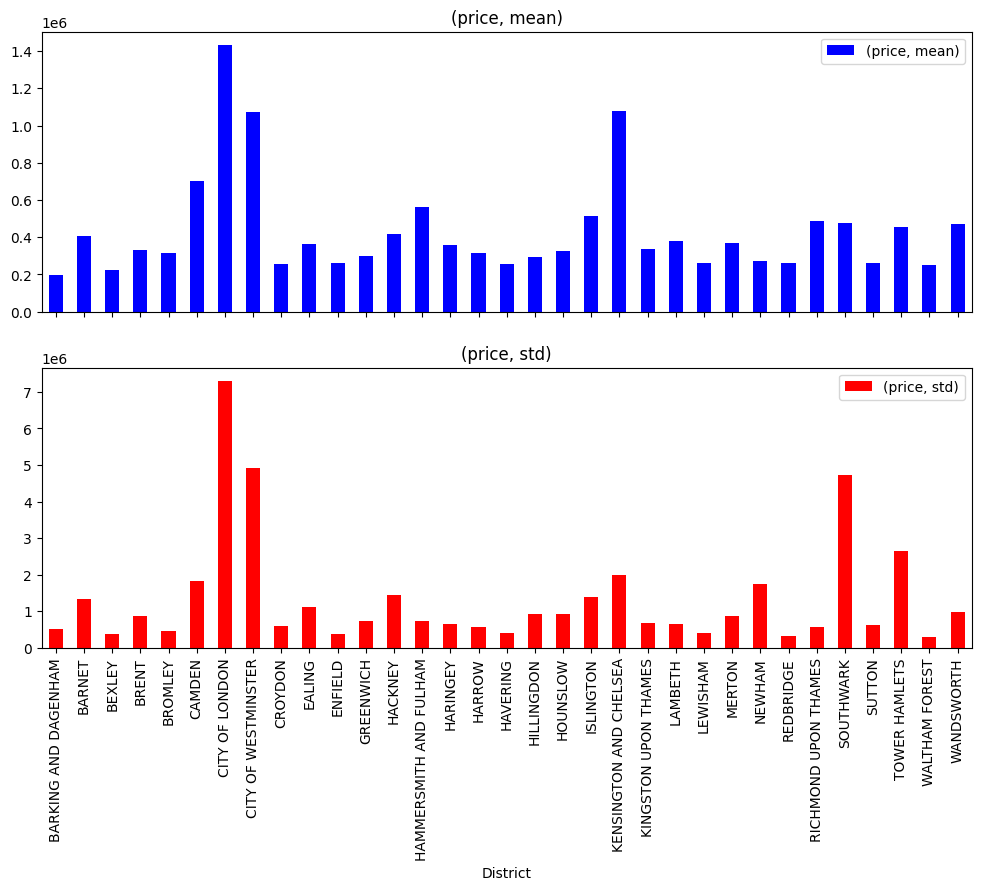

In [ ]:
%%time
test_data = data[["District", "price"]][data["County"] == "GREATER LONDON"].sample(frac = 0.1).groupby("District").agg({"price" : ["mean", "std"]})
test_data.plot.bar(subplots = True, color = ["blue", "red"], figsize = (12, 8))

In [ ]:
del test_data

### How does the combination of PPDCategory_Type and Old/New property status influence property prices?

> **Solution:** Create a visualization by plotting the median property prices against PPDCategory_Type and Old/New.

> **Answer:** An interesting observation is that the price of new properties consistently remains the highest across all property transfer durations.


INFO:distributed.core:Event loop was unresponsive in Nanny for 5.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 5.99s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


CPU times: user 37.1 s, sys: 3.34 s, total: 40.5 s
Wall time: 3min 5s


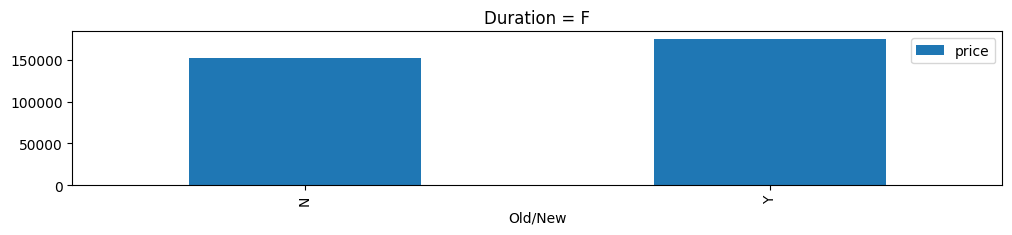

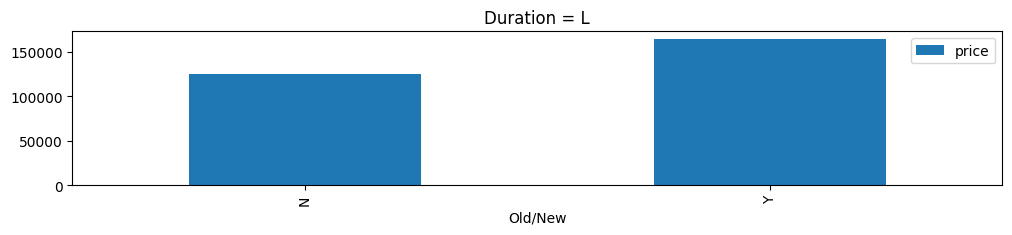

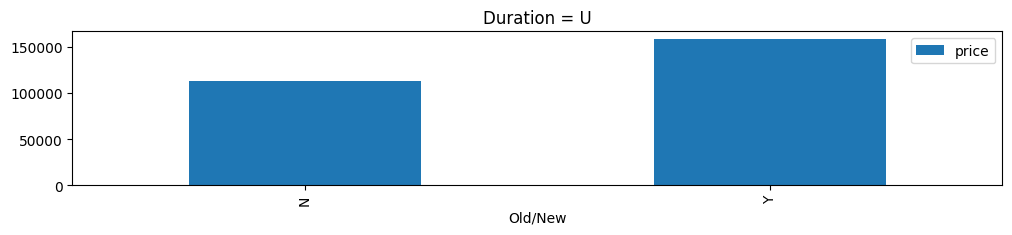

In [ ]:
%%time
test_data = data[["price", "Duration", "Old/New"]].sample(frac = 0.1).groupby(["Duration", "Old/New"], as_index = False).median()

ax = test_data.groupby("Duration").plot( x = "Old/New", y = "price", kind = "bar", figsize = (12, 2))
for title, a in dict(ax).items():
  a.set_title(f"Duration = {title}")

### What is the trend in property prices over time?

> **Solution:** Create a line plot of property prices over time, with each line representing a month.

> **Answer:** The graph illustrates a general upward trend in property prices over time, which is expected. However, the intriguing observation is the fluctuation of prices within the same year, showing increasing dispersion. Before around 2012, most lines followed a similar trend, but the dispersion increased over the years. Some lines exhibited price increases, while others showed decreases within the same year.


INFO:distributed.core:Event loop was unresponsive in Scheduler for 9.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.25s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.25s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


CPU times: user 2min 37s, sys: 11.6 s, total: 2min 49s
Wall time: 9min 18s


<Axes: xlabel='year', ylabel='price'>

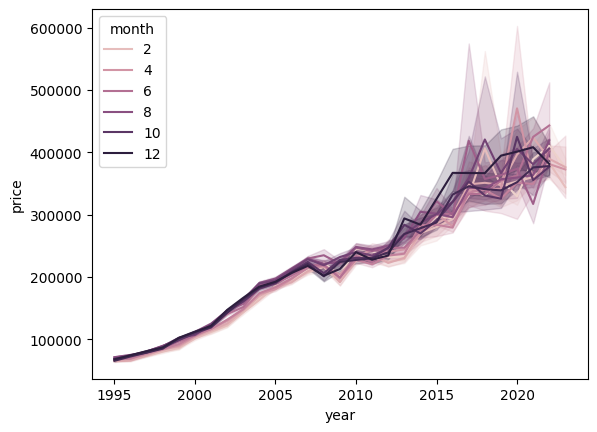

In [4]:
%%time
plot_data =  data.sample(frac = 0.1)
sns.lineplot(data = plot_data, x = "year", y = "price", hue = "month")

### How does the price of property vary based on different property types over time?

> **Solution:** Create a line plot of property prices over the years, with each line representing a different property type.

> **Answer:** Upon observation, it is evident that Type O properties consistently command the highest prices throughout most periods, although they also experience notable fluctuations. In contrast, other property types exhibit a smoother and steadily increasing trend over time.


INFO:distributed.core:Event loop was unresponsive in Nanny for 4.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 4.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


CPU times: user 1min 34s, sys: 4.93 s, total: 1min 39s
Wall time: 4min 37s


<Axes: xlabel='year', ylabel='price'>

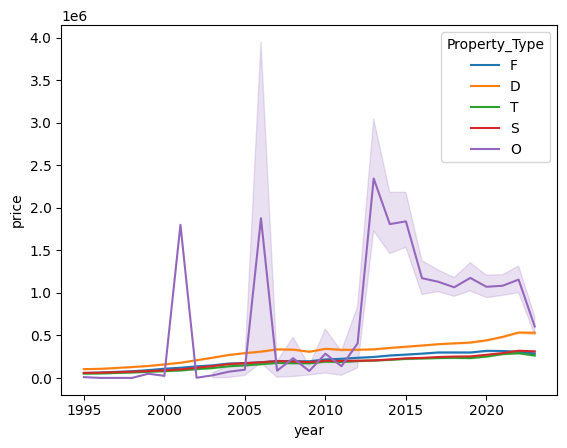

In [ ]:
%%time
sns.lineplot(data = data.sample(frac = 0.1), x = "year", y = "price", hue = "Property_Type")

## Inferences and Conclusion
In examining the distribution of property prices, we observed a significant difference between the mean (approximately \$218,000) and median (\$150,000), indicating a highly right-skewed distribution. The coefficient of skewness for property prices is almost 90 times that of an exponential distribution, emphasizing the substantial skewness. This suggests that the median is a more robust estimator than the mean, underscoring the uneven distribution of property prices globally.

When considering the influence of location, the country of property location was found to exhibit a relationship with prices, as measured by mutual information regression. However, the influence was not deemed substantial, suggesting that other factors contribute significantly to property prices. Further exploration into districts within the Greater London country revealed that higher mean prices coincided with higher standard deviations, indicating a greater disparity in property prices within districts with elevated mean prices.

Property characteristics, particularly property type, were identified as significant influencers of prices. A box plot analysis illustrated variations among property types, prompting a closer examination into the heights of property prices.

The combination of PPDCategory_Type and Old/New property status revealed that new properties consistently commanded the highest prices across all property transfer durations.

Analyzing property prices over time showed a general upward trend, with interesting fluctuations observed within the same year. The dispersion of prices increased over the years, with some lines exhibiting price increases and others showing decreases within the same year.

A detailed investigation into property prices influenced by different property types over time revealed that type O properties consistently had the highest prices in most periods but also experienced high fluctuations. Other property types exhibited a smoother increasing trend.

In conclusion, this comprehensive analysis provides valuable insights into the factors influencing property prices. It underscores the need for nuanced considerations in understanding the dynamics of the real estate market.

### My Modin Journey: Empowering Data Analysis on a Massive Dataset

Embarking on the journey of using Modin to replace Pandas for processing a massive dataset has been an enlightening experience. One of the most profound realizations was Modin's ability to seamlessly integrate into existing workflows by implementing almost all general-use Pandas functions. Its decision to maintain an identical interface with Pandas is a game-changer, allowing for collaborative usage with popular libraries like Scikit-learn (sklearn) and Seaborn. This level of compatibility is particularly impressive, setting Modin apart from alternatives like Dask.

In contrast to Dask's lazy calculation approach, which requires explicit calls to `.compute` or `.persist` to execute operations, Modin's consistent interface with Pandas ensures a smooth transition for users. The hassle-free interoperability with other widely-used libraries facilitates a more streamlined and efficient workflow.

Modin's underlying engine, powered by Dask, Ray, or other distributed computation libraries, provides a sense of freedom from concerns at the hardware level. This enables a more focused and efficient exploration of the dataset without the need to delve into low-level infrastructure details.

However, the journey with Modin also highlighted areas where further progress is needed. The scheduling and automation aspects, while powerful, lack the intelligence to operate seamlessly without some manual adjustments. Parameters such as `n_workers` and `n_partition` require careful tuning, and the success of the entire operation hinges on finding the right balance. This trial-and-error process can be cumbersome, especially when aiming to prevent system crashes and optimize computational efficiency.
.


## References and Future Work

### Future Work

The potential future work in this analysis are extensive, presenting exciting opportunities to enhance our understanding of future property prices. One direction involves the development of precise predictive models that can forecast property prices with a high degree of accuracy. Such models would prove immensely beneficial for investors and government entities, empowering them to strategically plan and optimize decisions for the benefit of the general public.

In particular, exploring advanced sequence models, such as Markov Chain and Recurrent Neural Network (RNN), holds great promise for addressing the complexities of predicting future property prices.

### References

1. Modin Documentation - [Getting Started](https://modin.readthedocs.io/en/stable/getting_started/quickstart.html)
2. Pandas Documentation - [pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
3. Seaborn Documentation - [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)
4. Dask Documentation - [Dask Client](https://distributed.dask.org/en/latest/client.html)
5. Modin Documentation - [Register Your Own Function](https://modin.readthedocs.io/en/stable/flow/modin/core/dataframe/algebra.html#how-to-register-your-own-function)
6. Modin Documentation - [Supported APIs](https://modin.readthedocs.io/en/stable/supported_apis/index.html)
7. Modin Documentation - [Optimization Notes](https://modin.readthedocs.io/en/stable/usage_guide/optimization_notes/index.html)

